## 드라이브 마운트

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 라이브러리 불러오기

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') 

import plotly.express as px
import seaborn as sns
sns.set_style('darkgrid', {'axes.facecolor': '.9'})
sns.set_palette(palette='deep')
sns_c = sns.color_palette(palette='deep')

import math
from sklearn.manifold import TSNE
from sklearn import manifold

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from itertools import product

In [18]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') 
%matplotlib inline

In [3]:
# 한글 폰트 깨짐 현상 해결
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 11 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

## 데이터 불러오기

In [5]:
dir= '/content/drive/MyDrive/DNA/Modeling/Clustering'

df = pd.read_csv(dir + '/클러스터링 데이터프레임(표준화 시행).csv').drop(['Unnamed: 0'], axis = 1)

df1 = df.drop(['지하철 개수 보정', '정류장 개수', '65세이상 인구', '국민기초생활 노인 비율'], axis = 1)

In [6]:
df.head()

,구,동,지하철 개수 보정,정류장 개수,면적(k㎡) 대비 정류장개수 비율,65세이상 인구,인구 대비 정류장 개수,인구 대비 지하철 개수,65세이상 인구 비율,국민기초생활 노인 인구,일별 노인생활인구 평균,국민기초생활 노인 비율,평균 경사도
0,종로구,사직동,0.698532,0.523366,0.275995,-1.309322,1.373327,0.354864,0.439349,-0.804374,-0.279992,-0.635534,0.183835
1,종로구,삼청동,-0.884312,-0.543399,-0.957933,-2.063575,3.272466,-0.222892,1.691459,-0.994676,-1.872351,-0.770168,-0.323557
2,종로구,부암동,-0.884312,0.590039,-0.693258,-1.290942,1.404257,-0.222892,0.442604,-0.820922,-0.593886,-0.695708,-3.057235
3,종로구,평창동,-0.884312,1.790149,-1.442041,-0.218971,0.975913,-0.222892,0.533266,-0.874703,0.065292,-1.124559,-3.125998
4,종로구,무악동,-0.884312,-1.410145,-0.814545,-1.539077,-0.452489,-0.222892,0.085082,-0.705086,-1.485215,-0.077620,-2.005905


## 데이터 전처리

In [7]:
# outlier: 둔촌1동 제거

df = df.reset_index()
df = df[df['동']!='둔촌1동'].set_index('동').drop(['index'], axis = 1)

In [8]:
# log 변환

df['인구 대비 정류장 개수'] = np.log(df['인구 대비 정류장 개수'] + 1)
df['인구 대비 지하철 개수'] = np.log(df['인구 대비 지하철 개수'] + 1)
df.head()

,구,지하철 개수 보정,정류장 개수,면적(k㎡) 대비 정류장개수 비율,65세이상 인구,인구 대비 정류장 개수,인구 대비 지하철 개수,65세이상 인구 비율,국민기초생활 노인 인구,일별 노인생활인구 평균,국민기초생활 노인 비율,평균 경사도
동,,,,,,,,,,,,
사직동,종로구,0.698532,0.523366,0.275995,-1.309322,0.864293,0.303701,0.439349,-0.804374,-0.279992,-0.635534,0.183835
삼청동,종로구,-0.884312,-0.543399,-0.957933,-2.063575,1.452191,-0.252175,1.691459,-0.994676,-1.872351,-0.770168,-0.323557
부암동,종로구,-0.884312,0.590039,-0.693258,-1.290942,0.877241,-0.252175,0.442604,-0.820922,-0.593886,-0.695708,-3.057235
평창동,종로구,-0.884312,1.790149,-1.442041,-0.218971,0.681030,-0.252175,0.533266,-0.874703,0.065292,-1.124559,-3.125998
무악동,종로구,-0.884312,-1.410145,-0.814545,-1.539077,-0.602373,-0.252175,0.085082,-0.705086,-1.485215,-0.077620,-2.005905


#### 상관계수 바탕으로 변수 선택

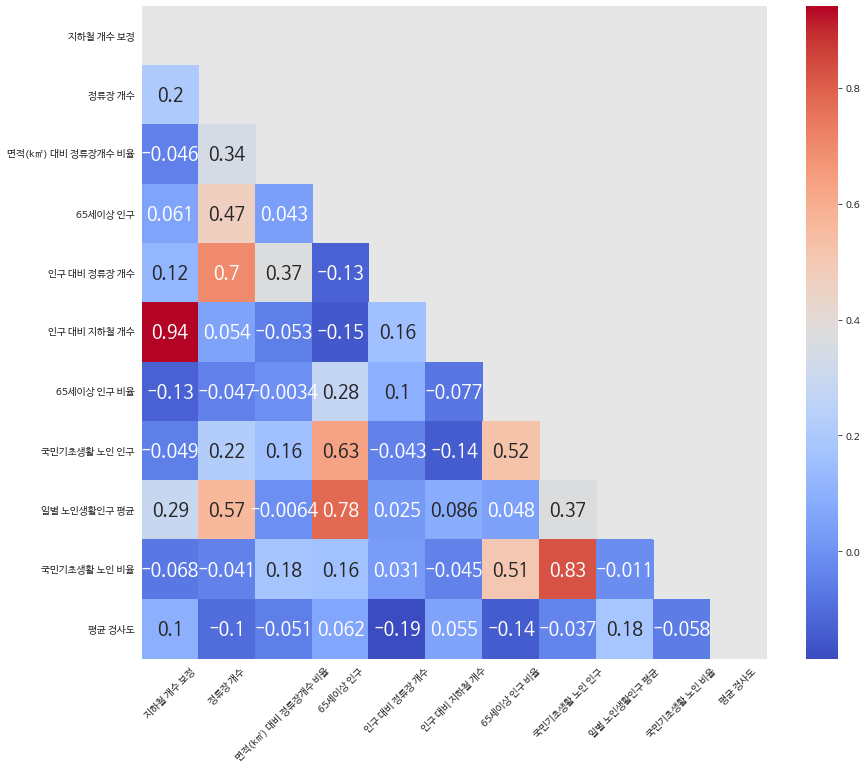

In [9]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') 
%matplotlib inline
import seaborn as sns
corr = df.drop(['구'], axis = 1).corr(method = 'spearman')

f, ax = plt.subplots(figsize=(14, 12))

mask = np.triu(np.ones_like(corr, dtype=bool))

sns.heatmap(corr, annot=True, mask = mask, cmap='coolwarm', annot_kws={"size": 18})
ax.set_xticklabels(ax.get_xticklabels(),rotation = 45)

plt.rc('xtick', labelsize=18) 
plt.rc('ytick', labelsize=18) 

In [10]:
df1 = df.drop(['지하철 개수 보정', '정류장 개수', '65세이상 인구', '국민기초생활 노인 비율'], axis = 1)

In [11]:
df2 = df1.drop(['구'], axis = 1).copy()
df2.head()

,면적(k㎡) 대비 정류장개수 비율,인구 대비 정류장 개수,인구 대비 지하철 개수,65세이상 인구 비율,국민기초생활 노인 인구,일별 노인생활인구 평균,평균 경사도
동,,,,,,,
사직동,0.275995,0.864293,0.303701,0.439349,-0.804374,-0.279992,0.183835
삼청동,-0.957933,1.452191,-0.252175,1.691459,-0.994676,-1.872351,-0.323557
부암동,-0.693258,0.877241,-0.252175,0.442604,-0.820922,-0.593886,-3.057235
평창동,-1.442041,0.681030,-0.252175,0.533266,-0.874703,0.065292,-3.125998
무악동,-0.814545,-0.602373,-0.252175,0.085082,-0.705086,-1.485215,-2.005905


# Kmeans

### elbow method

KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7fee6323aa90>,
                 estimator=KMeans(init='random', n_clusters=9, random_state=42),
                 k=(1, 10))

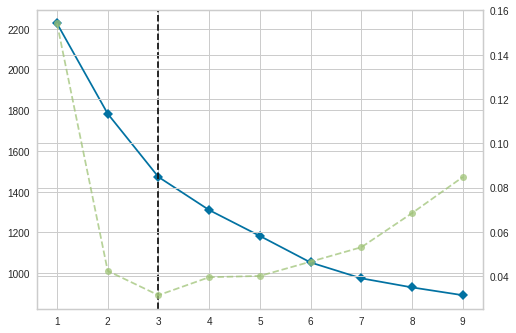

In [12]:
from yellowbrick.cluster import KElbowVisualizer

model = KMeans(init="random", n_init=10, max_iter=300, random_state=42)
visualizer = KElbowVisualizer(model, k=(1,10))
visualizer.fit(df2)

### silhoutte analysis

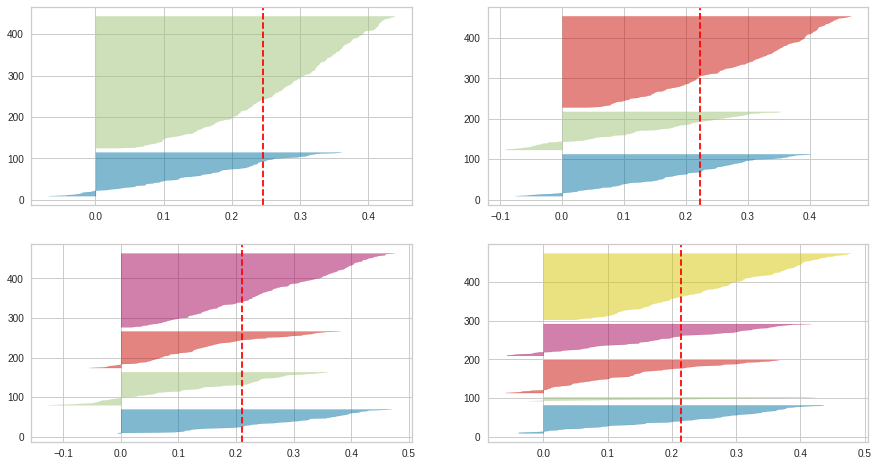

In [13]:
from yellowbrick.cluster import SilhouetteVisualizer
 
fig, ax = plt.subplots(2, 2, figsize=(15,8))
k = [2, 3, 4, 5]

for i, k in enumerate(k):
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=k, init='random', n_init=10, max_iter=300, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q][mod])
    visualizer.fit(df2)

In [14]:
k=3
kmeans = KMeans(init="random", n_clusters=k, n_init=10, max_iter=300, random_state=42)
km_fit = kmeans.fit(df2)
print("silhouette score : {0:.3f}".format(silhouette_score(df2, kmeans.labels_),3))

silhouette score : 0.224


### visualtization

In [15]:
df1['cluster'] = kmeans.labels_
df1.head()

,구,면적(k㎡) 대비 정류장개수 비율,인구 대비 정류장 개수,인구 대비 지하철 개수,65세이상 인구 비율,국민기초생활 노인 인구,일별 노인생활인구 평균,평균 경사도,cluster
동,,,,,,,,,
사직동,종로구,0.275995,0.864293,0.303701,0.439349,-0.804374,-0.279992,0.183835,2
삼청동,종로구,-0.957933,1.452191,-0.252175,1.691459,-0.994676,-1.872351,-0.323557,0
부암동,종로구,-0.693258,0.877241,-0.252175,0.442604,-0.820922,-0.593886,-3.057235,0
평창동,종로구,-1.442041,0.681030,-0.252175,0.533266,-0.874703,0.065292,-3.125998,0
무악동,종로구,-0.814545,-0.602373,-0.252175,0.085082,-0.705086,-1.485215,-2.005905,0


cluster
0    104
1     95
2    226
Name: 동, dtype: int64


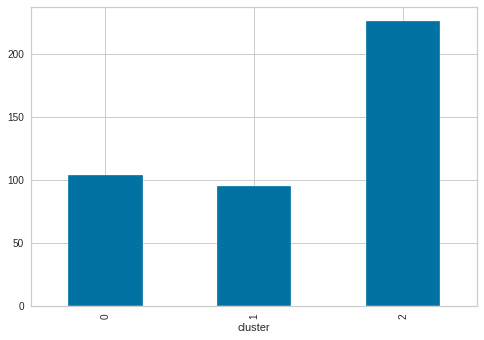

In [16]:
df3 = df1.copy()
df3 = df3.reset_index()

cluster_size = df3.groupby(['cluster'])['동'].count()
cluster_size.plot(kind = 'bar')
print(cluster_size)    

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


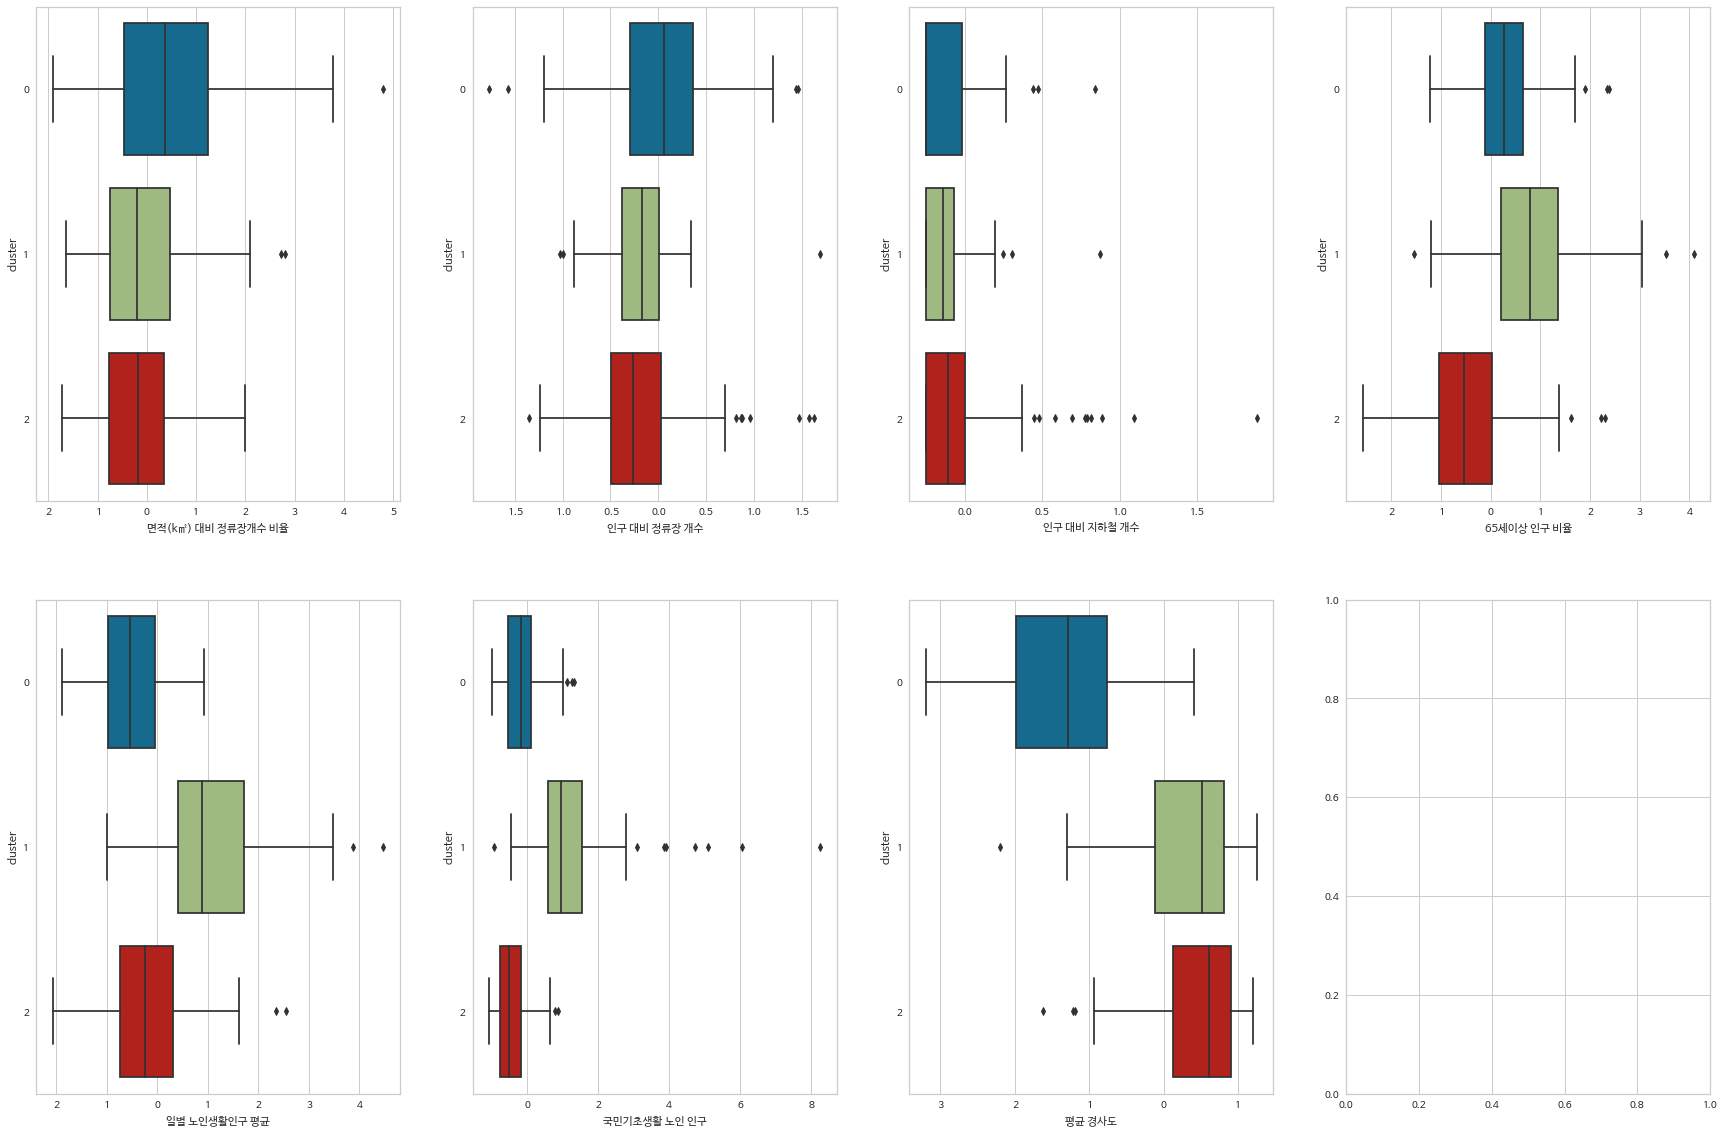

In [19]:
figure, ((ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8)) = plt.subplots(nrows = 2, ncols = 4)
figure.set_size_inches(30, 20)

sns.boxplot(data = df3, y = 'cluster', x = '면적(k㎡) 대비 정류장개수 비율', orient = 'h', ax = ax1)
sns.boxplot(data = df3, y = 'cluster', x = '인구 대비 정류장 개수', orient = 'h', ax = ax2)
sns.boxplot(data = df3, y = 'cluster', x = '인구 대비 지하철 개수', orient = 'h', ax = ax3)
sns.boxplot(data = df3, y = 'cluster', x = '65세이상 인구 비율', orient = 'h', ax = ax4)
sns.boxplot(data = df3, y = 'cluster', x = '일별 노인생활인구 평균', orient = 'h', ax = ax5)
sns.boxplot(data = df3, y = 'cluster', x = '국민기초생활 노인 인구', orient = 'h', ax = ax6)
sns.boxplot(data = df3, y = 'cluster', x = '평균 경사도', orient = 'h', ax = ax7)

### group by cluster

In [20]:
df['cluster'] = df1['cluster']
df.head()

,구,지하철 개수 보정,정류장 개수,면적(k㎡) 대비 정류장개수 비율,65세이상 인구,인구 대비 정류장 개수,인구 대비 지하철 개수,65세이상 인구 비율,국민기초생활 노인 인구,일별 노인생활인구 평균,국민기초생활 노인 비율,평균 경사도,cluster
동,,,,,,,,,,,,,
사직동,종로구,0.698532,0.523366,0.275995,-1.309322,0.864293,0.303701,0.439349,-0.804374,-0.279992,-0.635534,0.183835,2
삼청동,종로구,-0.884312,-0.543399,-0.957933,-2.063575,1.452191,-0.252175,1.691459,-0.994676,-1.872351,-0.770168,-0.323557,0
부암동,종로구,-0.884312,0.590039,-0.693258,-1.290942,0.877241,-0.252175,0.442604,-0.820922,-0.593886,-0.695708,-3.057235,0
평창동,종로구,-0.884312,1.790149,-1.442041,-0.218971,0.681030,-0.252175,0.533266,-0.874703,0.065292,-1.124559,-3.125998,0
무악동,종로구,-0.884312,-1.410145,-0.814545,-1.539077,-0.602373,-0.252175,0.085082,-0.705086,-1.485215,-0.077620,-2.005905,0


In [21]:
df.groupby(['cluster']).mean() # cluster 1 선택

,지하철 개수 보정,정류장 개수,면적(k㎡) 대비 정류장개수 비율,65세이상 인구,인구 대비 정류장 개수,인구 대비 지하철 개수,65세이상 인구 비율,국민기초생활 노인 인구,일별 노인생활인구 평균,국민기초생활 노인 비율,평균 경사도
cluster,,,,,,,,,,,
0,-0.252696,0.014345,0.442590,-0.321692,0.000821,-0.103480,0.294629,-0.178653,-0.523989,0.007366,-1.345106
1,0.123710,0.430726,-0.073835,1.207105,-0.188803,-0.108470,0.823388,1.263906,1.064122,0.865766,0.342275
2,0.064694,-0.181124,-0.165681,-0.348543,-0.220103,-0.058651,-0.494540,-0.444345,-0.198008,-0.363456,0.472751


In [22]:
df5 = df.reset_index().copy()

result_km = df5[df5['cluster'] == 1][['구', '동']]
result_km

,구,동
7,종로구,종로1.2.3.4가동
70,광진구,중곡4동
83,동대문구,청량리동
84,동대문구,용신동
85,동대문구,제기동
...,...,...
408,강동구,강일동
413,강동구,암사1동
416,강동구,천호1동
417,강동구,천호2동


In [23]:
temp = df5
temp.rename(columns={'지하철 개수 보정' : '지하철 개수'}, inplace=True)
# Target / Others 변수별 평균 데이터 생성
temp['cluster'] =  ["Target" if s == 1 else "Others" for s in temp['cluster']] 
dft = temp[['지하철 개수', '정류장 개수', '면적(k㎡) 대비 정류장개수 비율', '인구 대비 정류장 개수', '인구 대비 지하철 개수', '평균 경사도', 
             '65세이상 인구', '65세이상 인구 비율', '국민기초생활 노인 인구', '일별 노인생활인구 평균', '국민기초생활 노인 비율']].groupby(temp['cluster']).mean()
dft

,지하철 개수,정류장 개수,면적(k㎡) 대비 정류장개수 비율,인구 대비 정류장 개수,인구 대비 지하철 개수,평균 경사도,65세이상 인구,65세이상 인구 비율,국민기초생활 노인 인구,일별 노인생활인구 평균,국민기초생활 노인 비율
cluster,,,,,,,,,,,
Others,-0.035332,-0.119522,0.026016,-0.150478,-0.072779,-0.100149,-0.340081,-0.245832,-0.360612,-0.300742,-0.246591
Target,0.123710,0.430726,-0.073835,-0.188803,-0.108470,0.342275,1.207105,0.823388,1.263906,1.064122,0.865766


/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


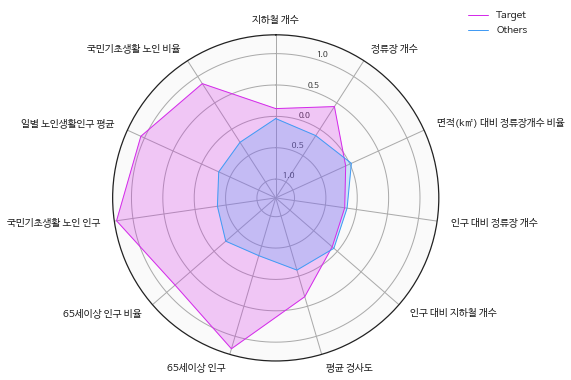

In [24]:
# Each attribute we'll plot in the radar chart.
labels = list(dft.columns)

# Number of variables we're plotting.
num_vars = len(labels)

# Split the circle into even parts and save the angles
# so we know where to put each axis.
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# The plot is a circle, so we need to "complete the loop"
# and append the start value to the end.
angles += angles[:1]

# ax = plt.subplot(polar=True)
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

# Helper function to plot each car on the radar chart.
def add_to_radar(Target, color):
  values = dft.loc[Target].tolist()
  values += values[:1]
  ax.plot(angles, values, color=color, linewidth=1, label=Target)
  ax.fill(angles, values, color=color, alpha=0.25)

# Add each car to the chart.
add_to_radar('Target', '#d42cea')
add_to_radar('Others', '#429bf4')
#add_to_radar('ford granada 1977', '#1aaf6c')

# Fix axis to go in the right order and start at 12 o'clock.
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)

# Draw axis lines for each angle and label.
ax.set_thetagrids(np.degrees(angles), labels)

# Go through labels and adjust alignment based on where
# it is in the circle.
for label, angle in zip(ax.get_xticklabels(), angles):
  if angle in (0, np.pi):
    label.set_horizontalalignment('center')
  elif 0 < angle < np.pi:
    label.set_horizontalalignment('left')
  else:
    label.set_horizontalalignment('right')

# Ensure radar goes from 0 to 100.
ax.set_ylim(-1.3, 1.3)
# You can also set gridlines manually like this:
# ax.set_rgrids([20, 40, 60, 80, 100])

# Set position of y-labels (0-100) to be in the middle
# of the first two axes.
ax.set_rlabel_position(180 / num_vars)

# Add some custom styling.
# Change the color of the tick labels.
ax.tick_params(colors='#222222')
# Make the y-axis (0-100) labels smaller.
ax.tick_params(axis='y', labelsize=8)
# Change the color of the circular gridlines.
ax.grid(color='#AAAAAA')
# Change the color of the outermost gridline (the spine).
ax.spines['polar'].set_color('#222222')
# Change the background color inside the circle itself.
ax.set_facecolor('#FAFAFA')

# Add title.
# ax.set_title('Comparing Variable Means', y=1.08)

# Add a legend as well.
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))


plt.rc('xtick', labelsize=18) 
plt.rc('ytick', labelsize=18) 

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


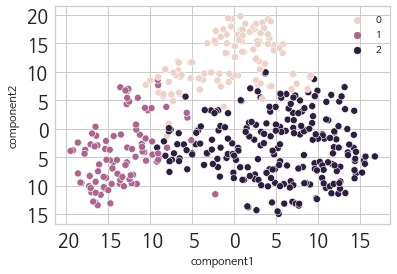

In [25]:
tsne = manifold.TSNE(
    n_components=2,
    init="random",
    random_state=0,
    perplexity=30,
    learning_rate="auto",
    n_iter=300,
)
Y = pd.DataFrame(tsne.fit_transform(df2), columns=['component1', 'component2'])

sns.scatterplot("component1", "component2", data=Y, hue=kmeans.labels_)
plt.rc('xtick', labelsize=5) 
plt.rc('ytick', labelsize=5) 

# K-means++

### elbow method

KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7fee5d6cd790>,
                 estimator=KMeans(n_clusters=9, random_state=42), k=(1, 10))

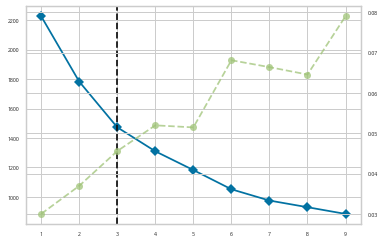

In [26]:
from yellowbrick.cluster import KElbowVisualizer

model = KMeans(init="k-means++", n_init=10, max_iter=300, random_state=42)
visualizer = KElbowVisualizer(model, k=(1,10))
visualizer.fit(df2)

### silhoultte analysis

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


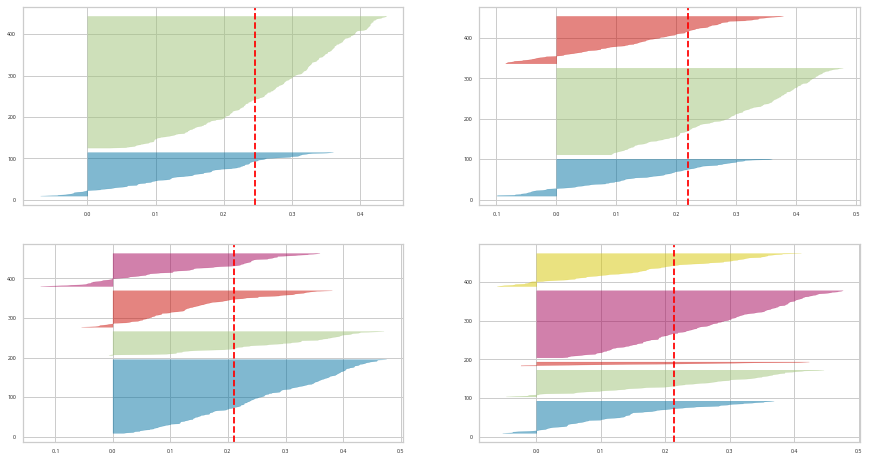

In [27]:
from yellowbrick.cluster import SilhouetteVisualizer
 
fig, ax = plt.subplots(2, 2, figsize=(15,8))
k = [2, 3, 4, 5]

for i, k in enumerate(k):
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=300, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q][mod])
    visualizer.fit(df2)

In [28]:
k=3
kmeans = KMeans(init="k-means++", n_clusters=k, n_init=10, max_iter=300, random_state=42)
km_fit = kmeans.fit(df2)
print("silhouette score : {0:.3f}".format(silhouette_score(df2, km_fit.labels_),3))

silhouette score : 0.219


### visualization

In [29]:
df1['cluster'] = km_fit.labels_
df1.head()

,구,면적(k㎡) 대비 정류장개수 비율,인구 대비 정류장 개수,인구 대비 지하철 개수,65세이상 인구 비율,국민기초생활 노인 인구,일별 노인생활인구 평균,평균 경사도,cluster
동,,,,,,,,,
사직동,종로구,0.275995,0.864293,0.303701,0.439349,-0.804374,-0.279992,0.183835,1
삼청동,종로구,-0.957933,1.452191,-0.252175,1.691459,-0.994676,-1.872351,-0.323557,2
부암동,종로구,-0.693258,0.877241,-0.252175,0.442604,-0.820922,-0.593886,-3.057235,2
평창동,종로구,-1.442041,0.681030,-0.252175,0.533266,-0.874703,0.065292,-3.125998,2
무악동,종로구,-0.814545,-0.602373,-0.252175,0.085082,-0.705086,-1.485215,-2.005905,2


cluster
0     92
1    215
2    118
Name: 동, dtype: int64


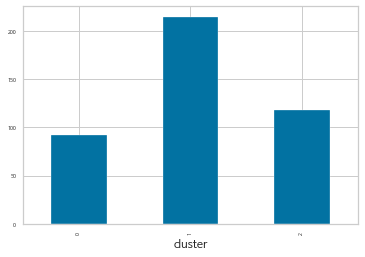

In [30]:
df3 = df1.copy()
df3 = df3.reset_index()

cluster_size = df3.groupby(['cluster'])['동'].count()
cluster_size.plot(kind = 'bar')
print(cluster_size)    

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


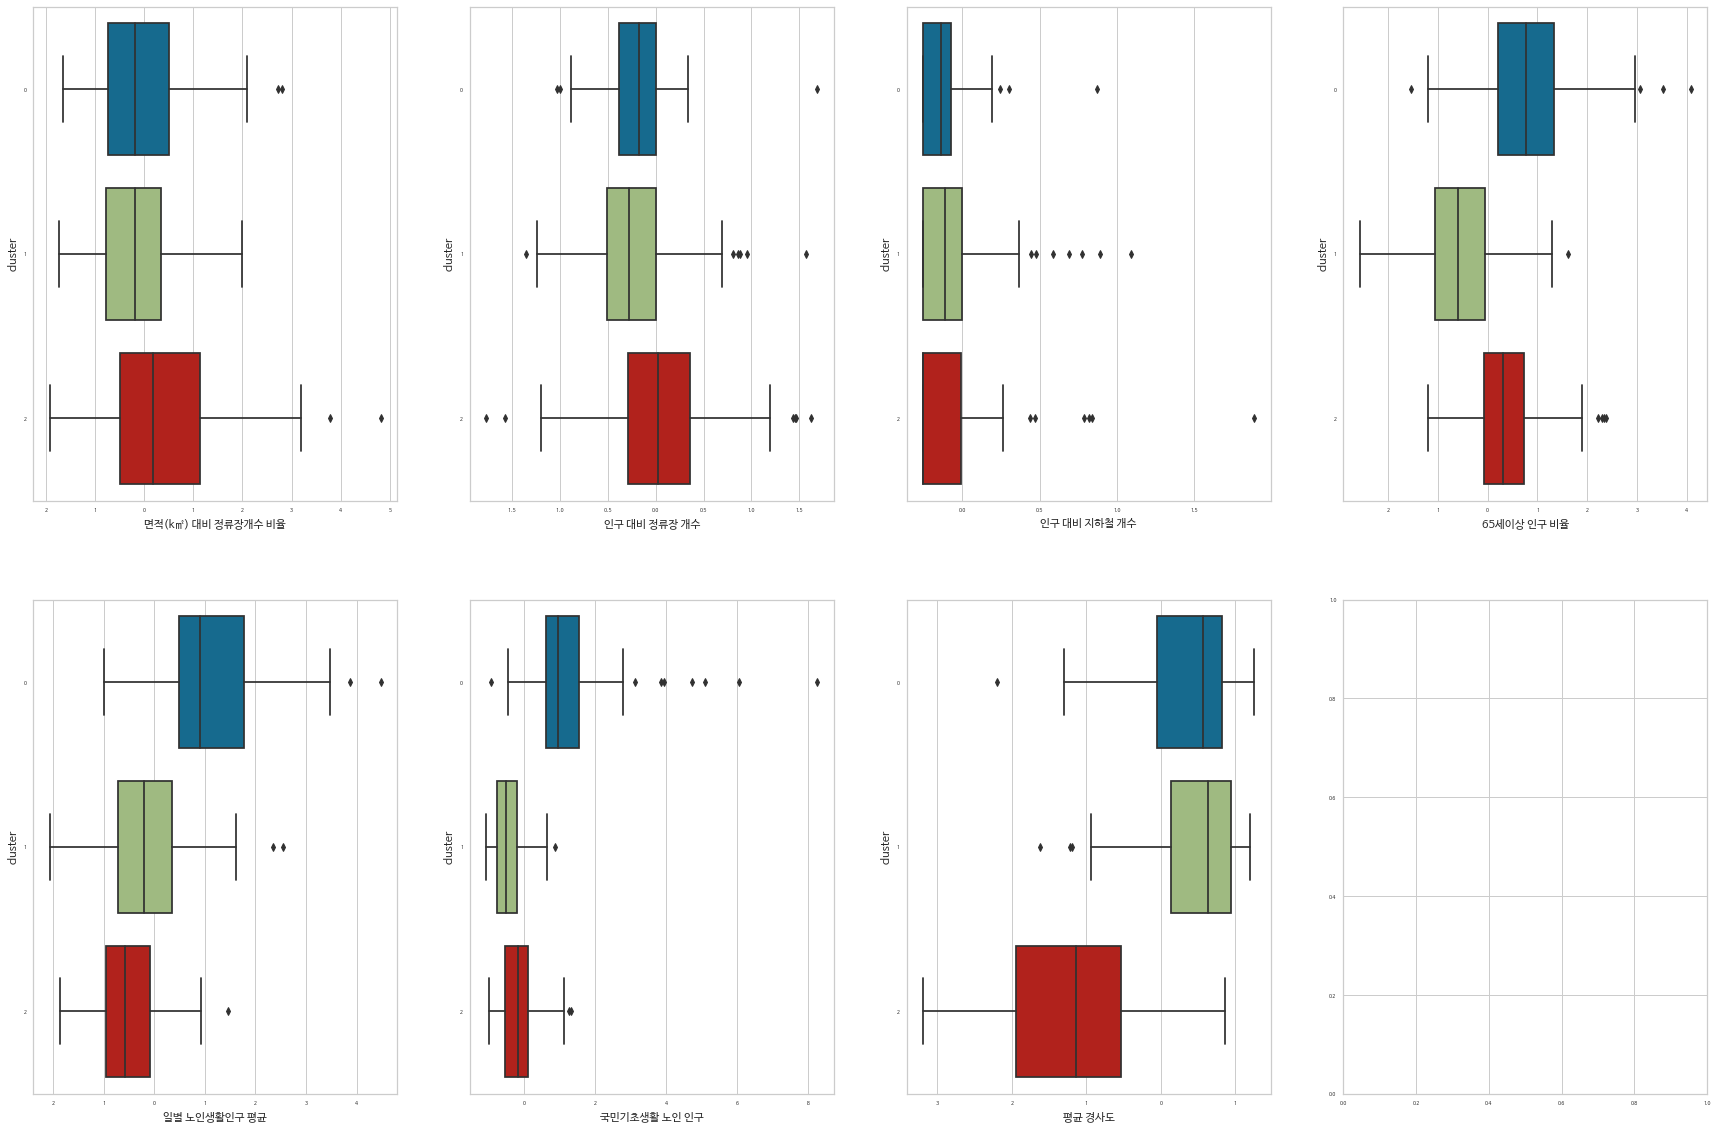

In [31]:
figure, ((ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8)) = plt.subplots(nrows = 2, ncols = 4)
figure.set_size_inches(30, 20)

sns.boxplot(data = df3, y = 'cluster', x = '면적(k㎡) 대비 정류장개수 비율', orient = 'h', ax = ax1)
sns.boxplot(data = df3, y = 'cluster', x = '인구 대비 정류장 개수', orient = 'h', ax = ax2)
sns.boxplot(data = df3, y = 'cluster', x = '인구 대비 지하철 개수', orient = 'h', ax = ax3)
sns.boxplot(data = df3, y = 'cluster', x = '65세이상 인구 비율', orient = 'h', ax = ax4)
sns.boxplot(data = df3, y = 'cluster', x = '일별 노인생활인구 평균', orient = 'h', ax = ax5)
sns.boxplot(data = df3, y = 'cluster', x = '국민기초생활 노인 인구', orient = 'h', ax = ax6)
sns.boxplot(data = df3, y = 'cluster', x = '평균 경사도', orient = 'h', ax = ax7)

### group by cluster

In [32]:
df['cluster'] = df1['cluster']
df.head()

,구,지하철 개수 보정,정류장 개수,면적(k㎡) 대비 정류장개수 비율,65세이상 인구,인구 대비 정류장 개수,인구 대비 지하철 개수,65세이상 인구 비율,국민기초생활 노인 인구,일별 노인생활인구 평균,국민기초생활 노인 비율,평균 경사도,cluster
동,,,,,,,,,,,,,
사직동,종로구,0.698532,0.523366,0.275995,-1.309322,0.864293,0.303701,0.439349,-0.804374,-0.279992,-0.635534,0.183835,1
삼청동,종로구,-0.884312,-0.543399,-0.957933,-2.063575,1.452191,-0.252175,1.691459,-0.994676,-1.872351,-0.770168,-0.323557,2
부암동,종로구,-0.884312,0.590039,-0.693258,-1.290942,0.877241,-0.252175,0.442604,-0.820922,-0.593886,-0.695708,-3.057235,2
평창동,종로구,-0.884312,1.790149,-1.442041,-0.218971,0.681030,-0.252175,0.533266,-0.874703,0.065292,-1.124559,-3.125998,2
무악동,종로구,-0.884312,-1.410145,-0.814545,-1.539077,-0.602373,-0.252175,0.085082,-0.705086,-1.485215,-0.077620,-2.005905,2


In [33]:
df.groupby(['cluster']).mean() # cluster 0 선택

,지하철 개수 보정,정류장 개수,면적(k㎡) 대비 정류장개수 비율,65세이상 인구,인구 대비 정류장 개수,인구 대비 지하철 개수,65세이상 인구 비율,국민기초생활 노인 인구,일별 노인생활인구 평균,국민기초생활 노인 비율,평균 경사도
cluster,,,,,,,,,,,
0,0.130773,0.442924,-0.057591,1.225202,-0.191722,-0.107299,0.809118,1.296411,1.095250,0.890564,0.366788
1,0.061713,-0.158557,-0.167346,-0.324369,-0.240667,-0.071586,-0.572520,-0.458656,-0.172234,-0.415014,0.485584
2,-0.213615,-0.043918,0.363126,-0.343484,0.015150,-0.076773,0.387713,-0.166014,-0.524457,0.069228,-1.175238


In [34]:
df5 = df.reset_index().copy()

result_kmp = df5[df5['cluster'] == 0][['구', '동']]
result_kmp

,구,동
7,종로구,종로1.2.3.4가동
70,광진구,중곡4동
83,동대문구,청량리동
84,동대문구,용신동
85,동대문구,제기동
...,...,...
408,강동구,강일동
413,강동구,암사1동
416,강동구,천호1동
417,강동구,천호2동


In [35]:
temp = df5
temp.rename(columns={'지하철 개수 보정' : '지하철 개수'}, inplace=True)
# Target / Others 변수별 평균 데이터 생성
temp['cluster'] =  ["Target" if s == 0 else "Others" for s in temp['cluster']] 
dft = temp[['지하철 개수', '정류장 개수', '면적(k㎡) 대비 정류장개수 비율', '인구 대비 정류장 개수', '인구 대비 지하철 개수', '평균 경사도', 
             '65세이상 인구', '65세이상 인구 비율', '국민기초생활 노인 인구', '일별 노인생활인구 평균', '국민기초생활 노인 비율']].groupby(temp['cluster']).mean()
dft

,지하철 개수,정류장 개수,면적(k㎡) 대비 정류장개수 비율,인구 대비 정류장 개수,인구 대비 지하철 개수,평균 경사도,65세이상 인구,65세이상 인구 비율,국민기초생활 노인 인구,일별 노인생활인구 평균,국민기초생활 노인 비율
cluster,,,,,,,,,,,
Others,-0.035851,-0.117934,0.020629,-0.150017,-0.073424,-0.102936,-0.331142,-0.232257,-0.354957,-0.297045,-0.243420
Target,0.130773,0.442924,-0.057591,-0.191722,-0.107299,0.366788,1.225202,0.809118,1.296411,1.095250,0.890564


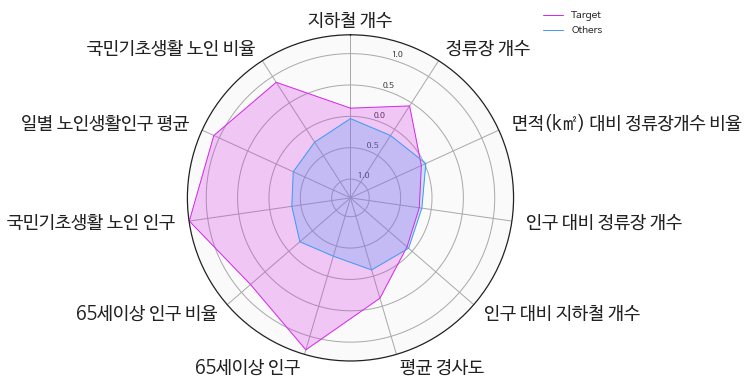

In [37]:
# Each attribute we'll plot in the radar chart.
labels = list(dft.columns)

# Number of variables we're plotting.
num_vars = len(labels)

# Split the circle into even parts and save the angles
# so we know where to put each axis.
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# The plot is a circle, so we need to "complete the loop"
# and append the start value to the end.
angles += angles[:1]

# ax = plt.subplot(polar=True)
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

# Helper function to plot each car on the radar chart.
def add_to_radar(Target, color):
  values = dft.loc[Target].tolist()
  values += values[:1]
  ax.plot(angles, values, color=color, linewidth=1, label=Target)
  ax.fill(angles, values, color=color, alpha=0.25)

# Add each car to the chart.
add_to_radar('Target', '#d42cea')
add_to_radar('Others', '#429bf4')
#add_to_radar('ford granada 1977', '#1aaf6c')

# Fix axis to go in the right order and start at 12 o'clock.
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)

# Draw axis lines for each angle and label.
ax.set_thetagrids(np.degrees(angles), labels)

# Go through labels and adjust alignment based on where
# it is in the circle.
for label, angle in zip(ax.get_xticklabels(), angles):
  if angle in (0, np.pi):
    label.set_horizontalalignment('center')
  elif 0 < angle < np.pi:
    label.set_horizontalalignment('left')
  else:
    label.set_horizontalalignment('right')

# Ensure radar goes from 0 to 100.
ax.set_ylim(-1.3, 1.3)
# You can also set gridlines manually like this:
# ax.set_rgrids([20, 40, 60, 80, 100])

# Set position of y-labels (0-100) to be in the middle
# of the first two axes.
ax.set_rlabel_position(180 / num_vars)

# Add some custom styling.
# Change the color of the tick labels.
ax.tick_params(colors='#222222')
# Make the y-axis (0-100) labels smaller.
ax.tick_params(axis='y', labelsize=8)
# Change the color of the circular gridlines.
ax.grid(color='#AAAAAA')
# Change the color of the outermost gridline (the spine).
ax.spines['polar'].set_color('#222222')
# Change the background color inside the circle itself.
ax.set_facecolor('#FAFAFA')

# Add title.
# ax.set_title('Comparing Variable Means', y=1.08)

# Add a legend as well.
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))


plt.rc('xtick', labelsize=18) 
plt.rc('ytick', labelsize=18) 

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


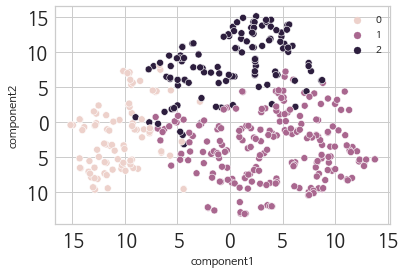

In [38]:
tsne = manifold.TSNE(
    n_components=2,
    init="random",
    random_state=0,
    perplexity=20,
    learning_rate="auto",
    n_iter=300,
)
Y = pd.DataFrame(tsne.fit_transform(df2), columns=['component1', 'component2'])

sns.scatterplot("component1", "component2", data=Y, hue=kmeans.labels_)
plt.rc('xtick', labelsize=5) 
plt.rc('ytick', labelsize=5) 

# Kmed

In [39]:
pip install scikit-learn-extra

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [40]:
from sklearn_extra.cluster import KMedoids

### elbow method

KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7fee5d207b20>,
                 estimator=KMedoids(init='build', n_clusters=9,
                                    random_state=42),
                 k=(1, 10))

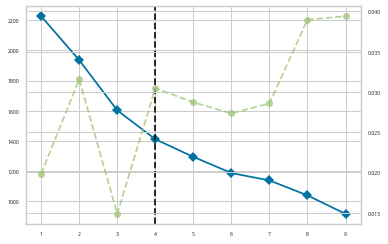

In [41]:
model = KMedoids(metric='euclidean', init='build', max_iter=300, random_state=42)
visualizer = KElbowVisualizer(model, k=(1,10))
visualizer.fit(df2)

### silhoutte analysis

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


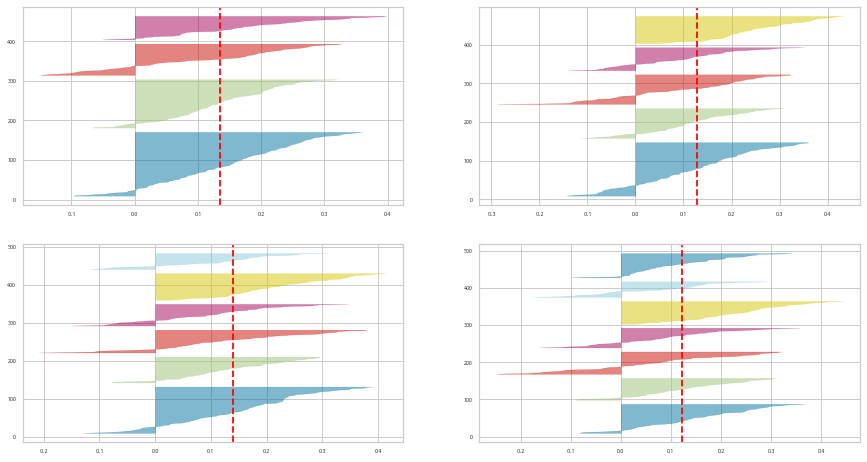

In [42]:
fig, ax = plt.subplots(2, 2, figsize=(15,8))
k = [4, 5, 6, 7]

for i, k in enumerate(k):
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMedoids(n_clusters = k, metric='euclidean', init='build', max_iter=300, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q][mod])
    visualizer.fit(df2)

In [43]:
k=4
kmedoids = KMedoids(n_clusters = k, metric='euclidean', init='build', max_iter=300, random_state=42)
kmd = kmedoids.fit(df2)
print("silhouette score : {0:.3f}".format(silhouette_score(df2, kmd.labels_),3))

silhouette score : 0.135


### visualization

In [44]:
df1['cluster'] = kmd.labels_
df1.head()

,구,면적(k㎡) 대비 정류장개수 비율,인구 대비 정류장 개수,인구 대비 지하철 개수,65세이상 인구 비율,국민기초생활 노인 인구,일별 노인생활인구 평균,평균 경사도,cluster
동,,,,,,,,,
사직동,종로구,0.275995,0.864293,0.303701,0.439349,-0.804374,-0.279992,0.183835,0
삼청동,종로구,-0.957933,1.452191,-0.252175,1.691459,-0.994676,-1.872351,-0.323557,1
부암동,종로구,-0.693258,0.877241,-0.252175,0.442604,-0.820922,-0.593886,-3.057235,3
평창동,종로구,-1.442041,0.681030,-0.252175,0.533266,-0.874703,0.065292,-3.125998,3
무악동,종로구,-0.814545,-0.602373,-0.252175,0.085082,-0.705086,-1.485215,-2.005905,3


cluster
0    162
1    123
2     80
3     60
Name: 동, dtype: int64


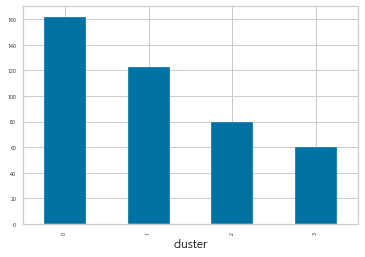

In [45]:
df3 = df1.copy()
df3 = df3.reset_index()

cluster_size = df3.groupby(['cluster'])['동'].count()
cluster_size.plot(kind = 'bar')
print(cluster_size)    

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


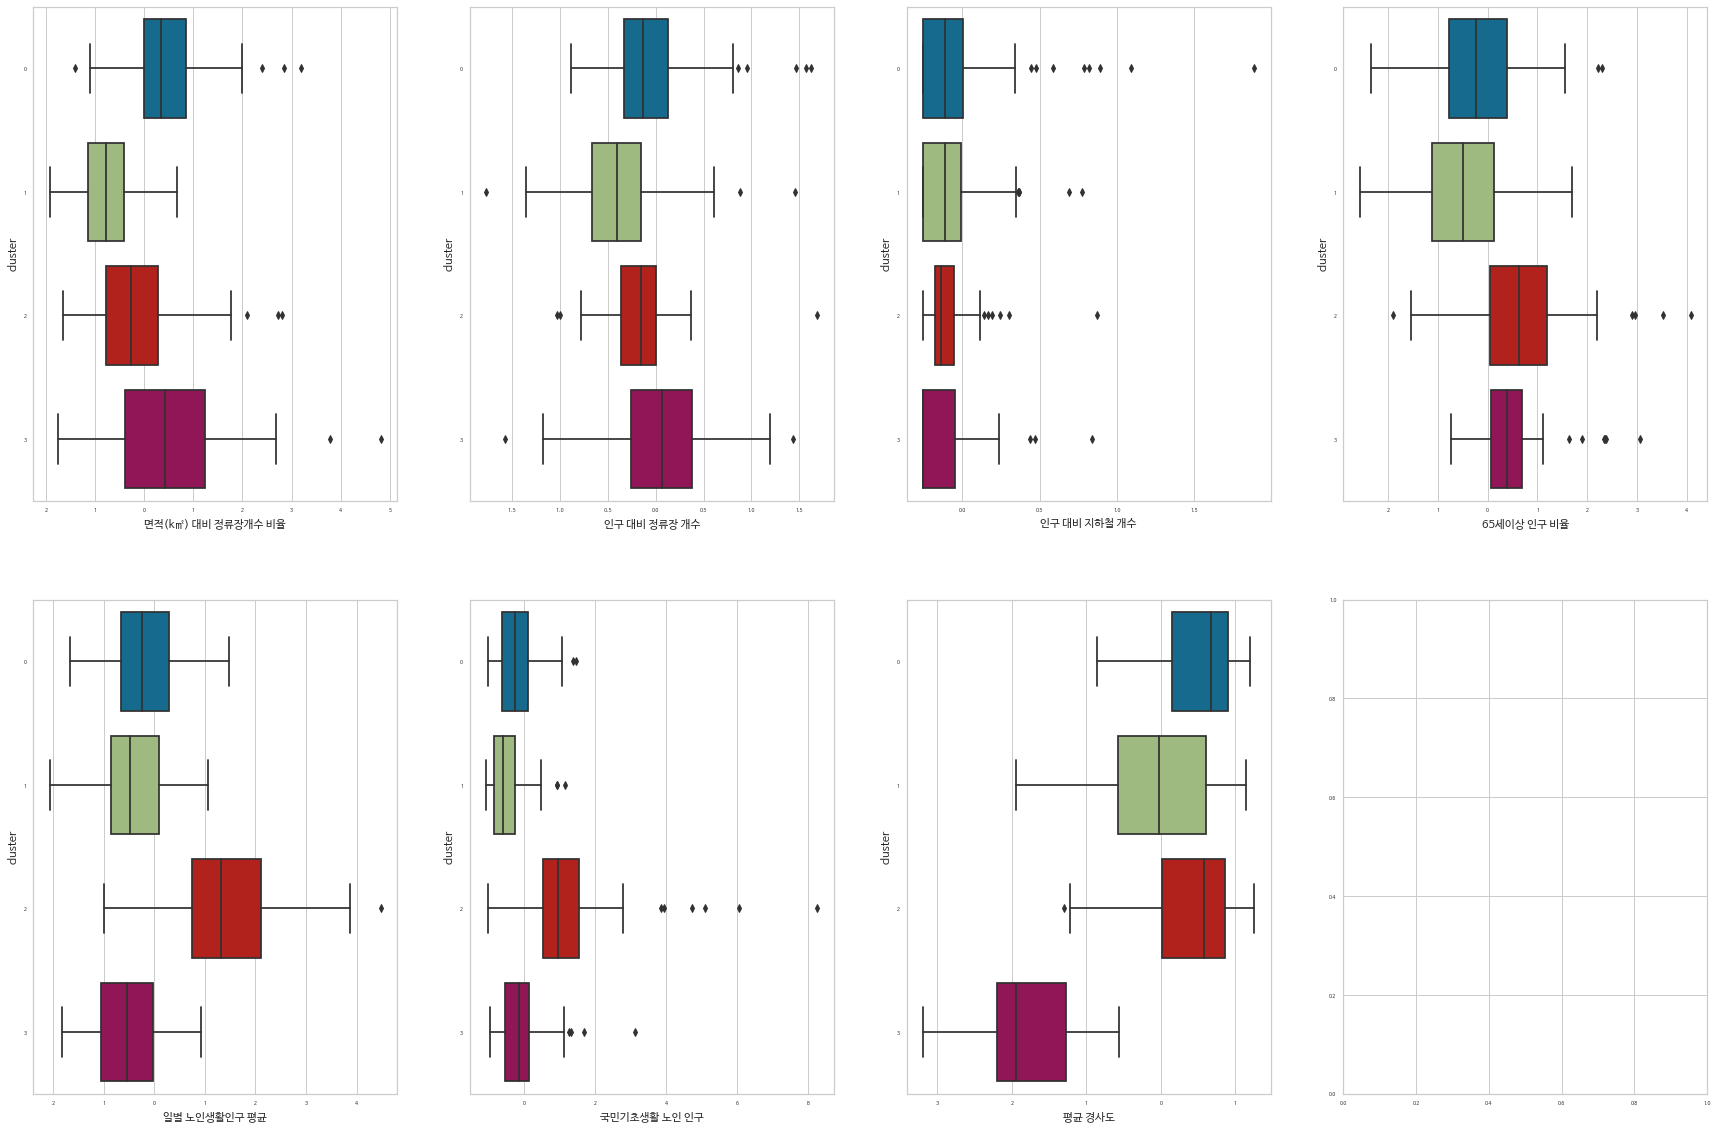

In [46]:
figure, ((ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8)) = plt.subplots(nrows = 2, ncols = 4)
figure.set_size_inches(30, 20)

sns.boxplot(data = df3, y = 'cluster', x = '면적(k㎡) 대비 정류장개수 비율', orient = 'h', ax = ax1)
sns.boxplot(data = df3, y = 'cluster', x = '인구 대비 정류장 개수', orient = 'h', ax = ax2)
sns.boxplot(data = df3, y = 'cluster', x = '인구 대비 지하철 개수', orient = 'h', ax = ax3)
sns.boxplot(data = df3, y = 'cluster', x = '65세이상 인구 비율', orient = 'h', ax = ax4)
sns.boxplot(data = df3, y = 'cluster', x = '일별 노인생활인구 평균', orient = 'h', ax = ax5)
sns.boxplot(data = df3, y = 'cluster', x = '국민기초생활 노인 인구', orient = 'h', ax = ax6)
sns.boxplot(data = df3, y = 'cluster', x = '평균 경사도', orient = 'h', ax = ax7)

### group by cluster

In [47]:
df['cluster'] = df1['cluster']
df.head()

,구,지하철 개수 보정,정류장 개수,면적(k㎡) 대비 정류장개수 비율,65세이상 인구,인구 대비 정류장 개수,인구 대비 지하철 개수,65세이상 인구 비율,국민기초생활 노인 인구,일별 노인생활인구 평균,국민기초생활 노인 비율,평균 경사도,cluster
동,,,,,,,,,,,,,
사직동,종로구,0.698532,0.523366,0.275995,-1.309322,0.864293,0.303701,0.439349,-0.804374,-0.279992,-0.635534,0.183835,0
삼청동,종로구,-0.884312,-0.543399,-0.957933,-2.063575,1.452191,-0.252175,1.691459,-0.994676,-1.872351,-0.770168,-0.323557,1
부암동,종로구,-0.884312,0.590039,-0.693258,-1.290942,0.877241,-0.252175,0.442604,-0.820922,-0.593886,-0.695708,-3.057235,3
평창동,종로구,-0.884312,1.790149,-1.442041,-0.218971,0.681030,-0.252175,0.533266,-0.874703,0.065292,-1.124559,-3.125998,3
무악동,종로구,-0.884312,-1.410145,-0.814545,-1.539077,-0.602373,-0.252175,0.085082,-0.705086,-1.485215,-0.077620,-2.005905,3


In [48]:
df.groupby(['cluster']).mean() # cluster 2 선택

,지하철 개수 보정,정류장 개수,면적(k㎡) 대비 정류장개수 비율,65세이상 인구,인구 대비 정류장 개수,인구 대비 지하철 개수,65세이상 인구 비율,국민기초생활 노인 인구,일별 노인생활인구 평균,국민기초생활 노인 비율,평균 경사도
cluster,,,,,,,,,,,
0,0.039014,0.029493,0.450854,-0.217650,-0.069023,-0.059624,-0.158584,-0.192788,-0.181779,-0.056079,0.487539
1,-0.060718,-0.446371,-0.741853,-0.427218,-0.369074,-0.083493,-0.492021,-0.497967,-0.393039,-0.451565,-0.044651
2,0.243465,0.580038,-0.156500,1.328904,-0.176549,-0.096974,0.679395,1.214687,1.395459,0.733002,0.427905
3,-0.303936,0.086659,0.538345,-0.267614,0.051794,-0.110587,0.482581,-0.060404,-0.533298,0.114333,-1.804245


In [49]:
df5 = df.reset_index().copy()

result_kmd = df5[df5['cluster'] == 2][['구', '동']]
result_kmd

,구,동
7,종로구,종로1.2.3.4가동
83,동대문구,청량리동
84,동대문구,용신동
85,동대문구,제기동
86,동대문구,전농1동
...,...,...
408,강동구,강일동
413,강동구,암사1동
416,강동구,천호1동
417,강동구,천호2동


In [50]:
temp = df5
temp.rename(columns={'지하철 개수 보정' : '지하철 개수'}, inplace=True)
# Target / Others 변수별 평균 데이터 생성
temp['cluster'] =  ["Target" if s == 2 else "Others" for s in temp['cluster']] 
dft = temp[['지하철 개수', '정류장 개수', '면적(k㎡) 대비 정류장개수 비율', '인구 대비 정류장 개수', '인구 대비 지하철 개수', '평균 경사도', 
             '65세이상 인구', '65세이상 인구 비율', '국민기초생활 노인 인구', '일별 노인생활인구 평균', '국민기초생활 노인 비율']].groupby(temp['cluster']).mean()
dft

,지하철 개수,정류장 개수,면적(k㎡) 대비 정류장개수 비율,인구 대비 정류장 개수,인구 대비 지하철 개수,평균 경사도,65세이상 인구,65세이상 인구 비율,국민기초생활 노인 인구,일별 노인생활인구 평균,국민기초생활 노인 비율
cluster,,,,,,,,,,,
Others,-0.056186,-0.130221,0.040844,-0.154986,-0.076997,-0.100770,-0.301055,-0.165955,-0.278568,-0.318232,-0.167442
Target,0.243465,0.580038,-0.156500,-0.176549,-0.096974,0.427905,1.328904,0.679395,1.214687,1.395459,0.733002


/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


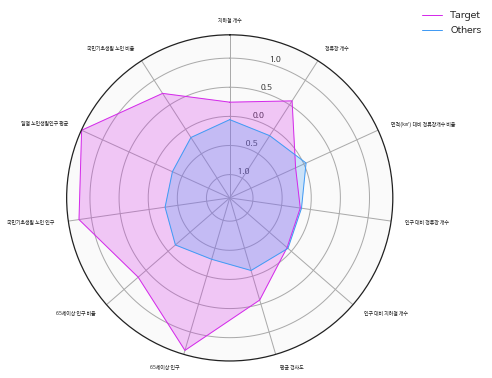

In [51]:
# Each attribute we'll plot in the radar chart.
labels = list(dft.columns)

# Number of variables we're plotting.
num_vars = len(labels)

# Split the circle into even parts and save the angles
# so we know where to put each axis.
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# The plot is a circle, so we need to "complete the loop"
# and append the start value to the end.
angles += angles[:1]

# ax = plt.subplot(polar=True)
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

# Helper function to plot each car on the radar chart.
def add_to_radar(Target, color):
  values = dft.loc[Target].tolist()
  values += values[:1]
  ax.plot(angles, values, color=color, linewidth=1, label=Target)
  ax.fill(angles, values, color=color, alpha=0.25)

# Add each car to the chart.
add_to_radar('Target', '#d42cea')
add_to_radar('Others', '#429bf4')
#add_to_radar('ford granada 1977', '#1aaf6c')

# Fix axis to go in the right order and start at 12 o'clock.
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)

# Draw axis lines for each angle and label.
ax.set_thetagrids(np.degrees(angles), labels)

# Go through labels and adjust alignment based on where
# it is in the circle.
for label, angle in zip(ax.get_xticklabels(), angles):
  if angle in (0, np.pi):
    label.set_horizontalalignment('center')
  elif 0 < angle < np.pi:
    label.set_horizontalalignment('left')
  else:
    label.set_horizontalalignment('right')

# Ensure radar goes from 0 to 100.
ax.set_ylim(-1.4, 1.4)
# You can also set gridlines manually like this:
# ax.set_rgrids([20, 40, 60, 80, 100])

# Set position of y-labels (0-100) to be in the middle
# of the first two axes.
ax.set_rlabel_position(180 / num_vars)

# Add some custom styling.
# Change the color of the tick labels.
ax.tick_params(colors='#222222')
# Make the y-axis (0-100) labels smaller.
ax.tick_params(axis='y', labelsize=8)
# Change the color of the circular gridlines.
ax.grid(color='#AAAAAA')
# Change the color of the outermost gridline (the spine).
ax.spines['polar'].set_color('#222222')
# Change the background color inside the circle itself.
ax.set_facecolor('#FAFAFA')

# Add title.
# ax.set_title('Comparing Variable Means', y=1.08)

# Add a legend as well.
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))


plt.rc('xtick', labelsize=18) 
plt.rc('ytick', labelsize=18) 

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


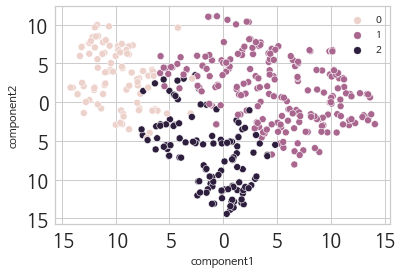

In [52]:
tsne = manifold.TSNE(
    n_components=2,
    init="random",
    random_state=0,
    perplexity=25,
    learning_rate="auto",
    n_iter=300,
)
Y = pd.DataFrame(tsne.fit_transform(df2), columns=['component1', 'component2'])

sns.scatterplot("component1", "component2", data=Y, hue=kmeans.labels_)
plt.rc('xtick', labelsize=5) 
plt.rc('ytick', labelsize=5) 

# Spectral Clustering

### PCA

In [53]:
from sklearn.cluster import SpectralClustering 
from sklearn.decomposition import PCA 
from sklearn.metrics import silhouette_score 

In [54]:
pca = PCA(n_components = 2)

df_pca = pd.DataFrame(pca.fit_transform(df2))
df_pca.columns = ['component1', 'component2']

df_pca

,component1,component2
0,-0.389112,0.357908
1,-0.710429,1.474138
2,-0.946803,2.411808
3,-0.710014,1.886217
4,-1.398332,1.696595
...,...,...
420,0.682190,-0.639684
421,-0.045734,-1.156535
422,0.331030,-0.744645
423,-1.153896,-1.256609


In [55]:
loadings = pca.components_
num_pca = pca.n_features_
pc_list = ["component"+str(i) for i in list(range(1, num_pca+1))]
loadings_df = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))
loadings_df['variable'] = df2.columns.values
loadings_df = loadings_df.set_index('variable')
loadings_df

,component1,component2
variable,,
면적(k㎡) 대비 정류장개수 비율,0.086961,0.388634
인구 대비 정류장 개수,0.018030,0.127950
인구 대비 지하철 개수,-0.008494,-0.007116
65세이상 인구 비율,0.542456,0.373967
국민기초생활 노인 인구,0.692799,0.046137
일별 노인생활인구 평균,0.455762,-0.439064
평균 경사도,0.100461,-0.705538


### grid search

In [56]:
nn = [3, 4, 8, 12]
k = [5, 7, 10, 13, 15]
assign = ['kmeans', 'discretize']
models = []

for i in nn:
  for j in k:
    for a in assign:
      sc_nn = SpectralClustering(n_clusters=i, affinity='nearest_neighbors', n_neighbors=j, assign_labels = a, random_state = 2022021328)
      models.append(sc_nn)

In [57]:
metric = []

for i in models:
  labels = i.fit_predict(df_pca)
  score = silhouette_score(df2, labels)
  metric.append(score)

print(max(metric))

max_idx = metric.index(max(metric))
models[max_idx]

0.19702119180366587


SpectralClustering(affinity='nearest_neighbors', n_clusters=3, n_neighbors=15,
                   random_state=2022021328)

### visualization

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


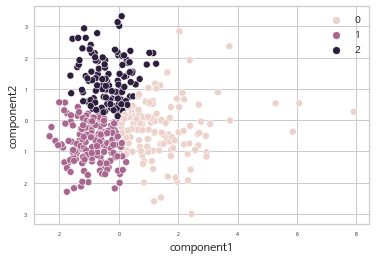

In [58]:
opt_model = models[max_idx]
opt_lab = opt_model.fit_predict(df_pca)

sns.scatterplot('component1', "component2", data=df_pca, hue=opt_lab)

In [59]:
df1['cluster'] = opt_lab
df1.head()

,구,면적(k㎡) 대비 정류장개수 비율,인구 대비 정류장 개수,인구 대비 지하철 개수,65세이상 인구 비율,국민기초생활 노인 인구,일별 노인생활인구 평균,평균 경사도,cluster
동,,,,,,,,,
사직동,종로구,0.275995,0.864293,0.303701,0.439349,-0.804374,-0.279992,0.183835,2
삼청동,종로구,-0.957933,1.452191,-0.252175,1.691459,-0.994676,-1.872351,-0.323557,2
부암동,종로구,-0.693258,0.877241,-0.252175,0.442604,-0.820922,-0.593886,-3.057235,2
평창동,종로구,-1.442041,0.681030,-0.252175,0.533266,-0.874703,0.065292,-3.125998,2
무악동,종로구,-0.814545,-0.602373,-0.252175,0.085082,-0.705086,-1.485215,-2.005905,2


cluster
0    131
1    171
2    123
Name: 동, dtype: int64


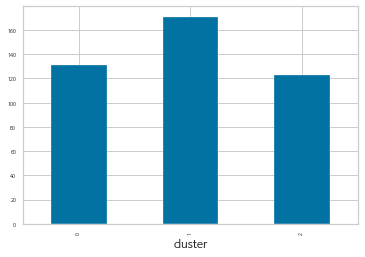

In [60]:
df3 = df1.copy()
df3 = df3.reset_index()

cluster_size = df3.groupby(['cluster'])['동'].count()
cluster_size.plot(kind = 'bar')
print(cluster_size)    

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


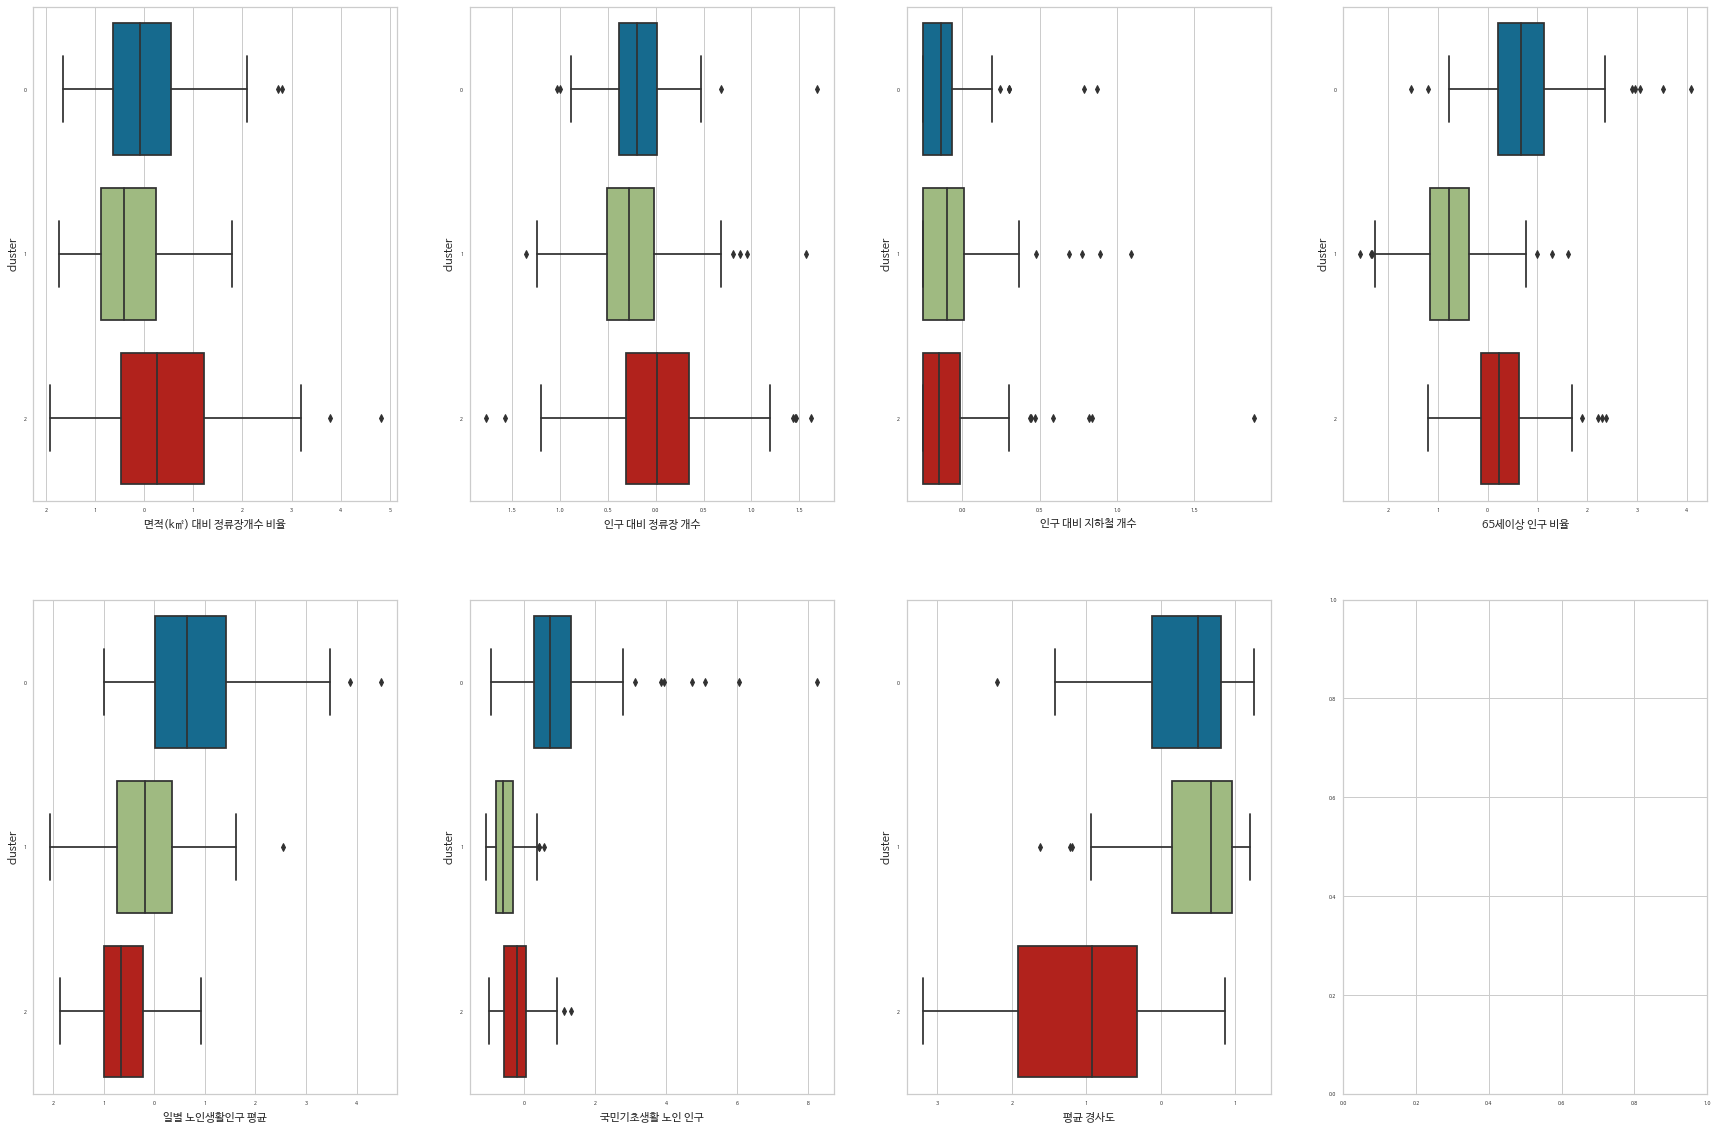

In [61]:
figure, ((ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8)) = plt.subplots(nrows = 2, ncols = 4)
figure.set_size_inches(30, 20)

sns.boxplot(data = df3, y = 'cluster', x = '면적(k㎡) 대비 정류장개수 비율', orient = 'h', ax = ax1)
sns.boxplot(data = df3, y = 'cluster', x = '인구 대비 정류장 개수', orient = 'h', ax = ax2)
sns.boxplot(data = df3, y = 'cluster', x = '인구 대비 지하철 개수', orient = 'h', ax = ax3)
sns.boxplot(data = df3, y = 'cluster', x = '65세이상 인구 비율', orient = 'h', ax = ax4)
sns.boxplot(data = df3, y = 'cluster', x = '일별 노인생활인구 평균', orient = 'h', ax = ax5)
sns.boxplot(data = df3, y = 'cluster', x = '국민기초생활 노인 인구', orient = 'h', ax = ax6)
sns.boxplot(data = df3, y = 'cluster', x = '평균 경사도', orient = 'h', ax = ax7)

### group by cluster

In [62]:
df['cluster'] = df1['cluster']
df.head()

,구,지하철 개수 보정,정류장 개수,면적(k㎡) 대비 정류장개수 비율,65세이상 인구,인구 대비 정류장 개수,인구 대비 지하철 개수,65세이상 인구 비율,국민기초생활 노인 인구,일별 노인생활인구 평균,국민기초생활 노인 비율,평균 경사도,cluster
동,,,,,,,,,,,,,
사직동,종로구,0.698532,0.523366,0.275995,-1.309322,0.864293,0.303701,0.439349,-0.804374,-0.279992,-0.635534,0.183835,2
삼청동,종로구,-0.884312,-0.543399,-0.957933,-2.063575,1.452191,-0.252175,1.691459,-0.994676,-1.872351,-0.770168,-0.323557,2
부암동,종로구,-0.884312,0.590039,-0.693258,-1.290942,0.877241,-0.252175,0.442604,-0.820922,-0.593886,-0.695708,-3.057235,2
평창동,종로구,-0.884312,1.790149,-1.442041,-0.218971,0.681030,-0.252175,0.533266,-0.874703,0.065292,-1.124559,-3.125998,2
무악동,종로구,-0.884312,-1.410145,-0.814545,-1.539077,-0.602373,-0.252175,0.085082,-0.705086,-1.485215,-0.077620,-2.005905,2


In [63]:
df.groupby(['cluster']).mean()

,지하철 개수 보정,정류장 개수,면적(k㎡) 대비 정류장개수 비율,65세이상 인구,인구 대비 정류장 개수,인구 대비 지하철 개수,65세이상 인구 비율,국민기초생활 노인 인구,일별 노인생활인구 평균,국민기초생활 노인 비율,평균 경사도
cluster,,,,,,,,,,,
0,0.058145,0.298409,0.028525,0.964980,-0.194645,-0.109645,0.729261,0.958618,0.807860,0.683531,0.328394
1,0.133892,-0.144922,-0.305177,-0.399489,-0.250574,-0.061731,-0.764026,-0.562178,-0.172615,-0.537353,0.503274
2,-0.247314,-0.104334,0.406663,-0.452451,0.006118,-0.076442,0.261891,-0.230710,-0.605412,0.026159,-1.053761


In [64]:
df5 = df.reset_index().copy()

result = df5[df5['cluster'] == 0][['구', '동']]
result

,구,동
7,종로구,종로1.2.3.4가동
34,용산구,남영동
70,광진구,중곡4동
83,동대문구,청량리동
84,동대문구,용신동
...,...,...
416,강동구,천호1동
417,강동구,천호2동
418,강동구,천호3동
420,강동구,성내2동


In [65]:
result.shape

(131, 2)

In [67]:
#os.chdir(dir)
#result.to_csv('sp_cl.csv')

In [68]:
temp = df5
temp.rename(columns={'지하철 개수 보정' : '지하철 개수'}, inplace=True)
# Target / Others 변수별 평균 데이터 생성
temp['cluster'] =  ["Target" if s == 0 else "Others" for s in temp['cluster']] 
dft = temp[['지하철 개수', '정류장 개수', '면적(k㎡) 대비 정류장개수 비율', '인구 대비 정류장 개수', '인구 대비 지하철 개수', '평균 경사도', 
             '65세이상 인구', '65세이상 인구 비율', '국민기초생활 노인 인구', '일별 노인생활인구 평균', '국민기초생활 노인 비율']].groupby(temp['cluster']).mean()
dft

,지하철 개수,정류장 개수,면적(k㎡) 대비 정류장개수 비율,인구 대비 정류장 개수,인구 대비 지하철 개수,평균 경사도,65세이상 인구,65세이상 인구 비율,국민기초생활 노인 인구,일별 노인생활인구 평균,국민기초생활 노인 비율
cluster,,,,,,,,,,,
Others,-0.025592,-0.127941,-0.007366,-0.143182,-0.067885,-0.148139,-0.421647,-0.334816,-0.423503,-0.353683,-0.301598
Target,0.058145,0.298409,0.028525,-0.194645,-0.109645,0.328394,0.964980,0.729261,0.958618,0.807860,0.683531


In [69]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 

%matplotlib inline

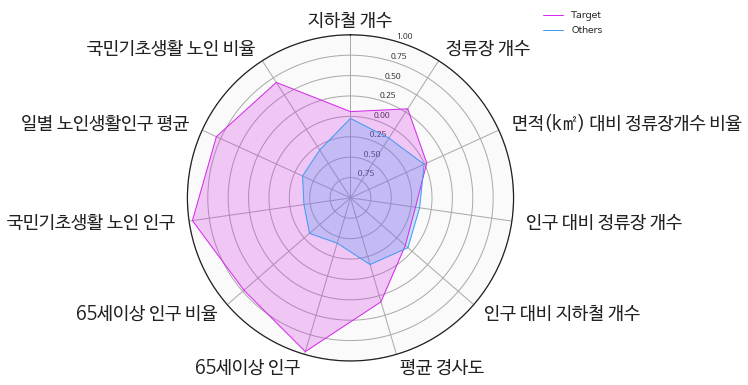

In [71]:
# Each attribute we'll plot in the radar chart.
labels = list(dft.columns)

# Number of variables we're plotting.
num_vars = len(labels)

# Split the circle into even parts and save the angles
# so we know where to put each axis.
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# The plot is a circle, so we need to "complete the loop"
# and append the start value to the end.
angles += angles[:1]

# ax = plt.subplot(polar=True)
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

# Helper function to plot each car on the radar chart.
def add_to_radar(Target, color):
  values = dft.loc[Target].tolist()
  values += values[:1]
  ax.plot(angles, values, color=color, linewidth=1, label=Target)
  ax.fill(angles, values, color=color, alpha=0.25)

# Add each car to the chart.
add_to_radar('Target', '#d42cea')
add_to_radar('Others', '#429bf4')
#add_to_radar('ford granada 1977', '#1aaf6c')

# Fix axis to go in the right order and start at 12 o'clock.
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)

# Draw axis lines for each angle and label.
ax.set_thetagrids(np.degrees(angles), labels)

# Go through labels and adjust alignment based on where
# it is in the circle.
for label, angle in zip(ax.get_xticklabels(), angles):
  if angle in (0, np.pi):
    label.set_horizontalalignment('center')
  elif 0 < angle < np.pi:
    label.set_horizontalalignment('left')
  else:
    label.set_horizontalalignment('right')

# Ensure radar goes from 0 to 100.
ax.set_ylim(-1, 1)
# You can also set gridlines manually like this:
# ax.set_rgrids([20, 40, 60, 80, 100])

# Set position of y-labels (0-100) to be in the middle
# of the first two axes.
ax.set_rlabel_position(180 / num_vars)

# Add some custom styling.
# Change the color of the tick labels.
ax.tick_params(colors='#222222')
# Make the y-axis (0-100) labels smaller.
ax.tick_params(axis='y', labelsize=8)
# Change the color of the circular gridlines.
ax.grid(color='#AAAAAA')
# Change the color of the outermost gridline (the spine).
ax.spines['polar'].set_color('#222222')
# Change the background color inside the circle itself.
ax.set_facecolor('#FAFAFA')

# Add title.
# ax.set_title('Comparing Variable Means', y=1.08)

# Add a legend as well.
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))


# plt.rc('xtick', labelsize=18) 
# plt.rc('ytick', labelsize=18) 

# 네 모형의 겹치는 행정동 뽑기

In [72]:
df = pd.merge(result_km, result_kmp, how = 'inner')

In [73]:
df = pd.merge(df, result_kmd, how = 'inner')

In [74]:
df = pd.merge(df, result, how = 'inner')

In [75]:
df

,구,동
0,종로구,종로1.2.3.4가동
1,동대문구,청량리동
2,동대문구,용신동
3,동대문구,제기동
4,동대문구,전농1동
...,...,...
68,강동구,강일동
69,강동구,암사1동
70,강동구,천호1동
71,강동구,천호2동


In [76]:
dir

'/content/drive/MyDrive/DNA/Modeling/Clustering'

In [80]:
df.to_csv('/content/drive/MyDrive/DNA/Data Archive/최종 선정 행정동.csv')

In [79]:
LH = pd.read_csv(dir+'/LH 서울시 통합 행정동 통합.csv', encoding="cp949")
LH

FileNotFoundError: ignored

In [ ]:
pd.set_option('display.max_rows', None)

In [ ]:
df_lh = pd.merge(df, LH, how = 'inner')
df_lh

,구,동,단지코드,단지명,세대수,동수,임대유형,주택유형,주소,Latitude,Longitude,준공일,입주지정시작일자,입주지정종료일자,위도,경도,비고
0,동대문구,장안1동,0,매입다가구(서울동대문구),45,0,기존주택매입임대,NaN,서울특별시 동대문구 장한로26길 85,37.571464,127.076239,2019,43799,NaN,37.571473,127.076357,0
1,중랑구,중화2동,0,매입다가구(서울중랑구),30,0,기존주택매입임대,NaN,서울특별시 중랑구 중랑천로 109,37.594838,127.072018,2017,42968,43068,37.594677,127.071947,0
2,중랑구,중화2동,0,매입다가구(서울중랑구),30,0,기존주택매입임대,NaN,서울특별시 중랑구 중랑천로 109,37.594838,127.072018,2017,42968,43068,37.594677,127.071947,0
3,중랑구,중화2동,0,매입다가구(서울중랑구),30,0,기존주택매입임대,NaN,서울특별시 중랑구 중랑천로 109,37.594838,127.072018,2017,42968,43068,37.594677,127.071947,0
4,도봉구,도봉2동,C00211,서울도봉,245,3,건설임대,국민임대,서울특별시 도봉구 도봉로180길 83-14(서울도봉주공아파트),37.682949,127.050719,2002-11-01,2002-12-01,2002-12-20,37.682607,127.050663,0
5,노원구,월계2동,C00225,서울월계1,2328,11,건설임대,영구임대+임대상가,서울특별시 노원구 초안산로1길 15 (월계1단지주공영구임대(아)),37.630911,127.054016,1993-09-01,1992-11-10,1992-12-09,37.627271,127.053425,0
6,노원구,하계1동,C02208,서울중계9 증축 영구임대주택(주거복지동),60,1,건설임대,영구임대+임대상가,서울특별시 노원구 노원로16길 15(하계동 중계주공9단지아파트),37.642888,127.073736,2017-09-01,2017-09-12,2017-10-11,37.643445,127.073337,0
7,노원구,하계1동,C00228,서울중계9,2693,16,건설임대,영구임대+임대상가,서울특별시 노원구 노원로16길 15 (중계9단지주공영구임대아파트),37.642888,127.073736,1992-09-18,1992-09-30,1992-10-29,37.643445,127.073337,0
8,노원구,중계4동,C00227,서울중계3,1345,6,건설임대,영구임대+임대상가,서울특별시 노원구 덕릉로 662 (중계3단지주공영구임대아파트),37.656494,127.076034,1991-09-14,1991-09-27,1991-10-26,37.656396,127.076659,0
9,노원구,중계4동,C02101,서울중계3 증축 영구임대(주거복지동),130,1,건설임대,영구임대,서울특별시 노원구 덕릉로 662(중계동 주공3단지아파트),37.656494,127.076034,2017-06-27,2016-10-07,2016-11-05,37.656396,127.076659,0


In [ ]:
import os
os.chdir(dir)
df_lh.to_csv('최종 선정 주택 30호 이상.csv')